In [1]:
import sympy as sp
import symbtools as st
%load_ext ipydex.displaytools
from sympy.interactive import printing
printing.init_printing()

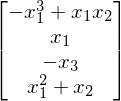

---


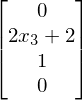

---


---


In [2]:
x1, x2, x3, x4 = xx = sp.symbols('x1:5')
u = sp.Symbol("u")


f = sp.Matrix([x1*x2 - x1**3, x1 , -x3, x1**2 + x2])  ##:
g = sp.Matrix([0, 2 + 2*x3 , 1, 0])  ##:
y = h = x4  ##:

In [3]:
# Hilfsterme
Lfh = st.lie_deriv(h, f, xx) ##:
Lf2h = st.lie_deriv(h, f, xx, 2) ##:
Lf3h = st.lie_deriv(h, f, xx, 3) ##:

---


---


---


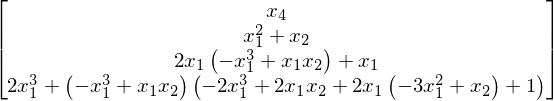

---


In [4]:
q = sp.Matrix([h, Lfh, Lf2h, Lf3h]) ##:

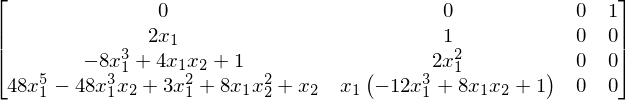

___


In [6]:
Q = q.jacobian(xx)
Q.simplify()
Q ##:

→ Beobachtbarkeitsrangbedingung ist nicht erfüllt

b) **Relativer Grad**

In [7]:
Lgh = st.lie_deriv(h, g, xx) ##:
LgLfh = st.lie_deriv(Lfh, g, xx) ##:

---


---


* $L_f h \equiv 0$ → r >1 
* $L_g L_f h \not \equiv 0$ → r = 1


c) **Byrnes-Isidori-Normalform**

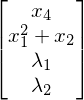

---


In [10]:
# der Ober Teil der Transformation ist klar
# Transformation ansetzen (mit Platzhaltern für die letzten  Komponenten):
lmd1, lmd2 = sp.symbols("lambda1, lambda2")

T_ = sp.Matrix([h, Lfh, lmd1, lmd2]) ##:


$\lambda_{1,2}$ müssen so gewählt werden, dass
* Transformation invertierbar wird
* $L_g \lambda_{1,2} \equiv 0$ gilt


Entweder durch "scharfes Hinsehen" oder systematisch. Hier systematischer Lösungsweg: Annihilator von span{$g$} bestimmen:

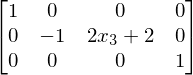

---


In [14]:
anni = st.nullspaceMatrix(g.T).T ##:

In [21]:
# Paket zum Rechnen mit Differentialformen laden
#(eigentlich hier nicht nötig, weil Rechnungen auch direkt ausgeführt werden könnten)
import pycartan as pc

In [22]:
w1 = pc.DifferentialForm(1, xx, coeff=anni[0, :]) ##:
w2 = pc.DifferentialForm(1, xx, coeff=anni[1, :]) ##:
w3 = pc.DifferentialForm(1, xx, coeff=anni[2, :]) ##:

w1 := (1)dx1

---


w2 := (-1)dx2  +  (2*x3 + 2)dx3

---


w3 := (1)dx4

---


In [24]:
# Einzelne Differentialformen integrieren
lmd1_ = w1.integrate()  ##:
lmd2_ = w2.integrate()  ##:
lmd3_ = w3.integrate()  ##:

---


---


---


$x_4$ ist schon im oberen Teil der Transformation als Variable enthalten ($z_1 = x_4$), deswegen ist $\lambda_4$ nicht zu gebrauchen. → $\lambda_{1,2}$ bilden die gesuchten Größen

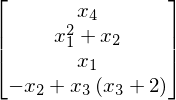

---


In [25]:
# geschickte Wahl von XX, so dass Transformation invertierbar wird
T = T_.subs([(lmd1, lmd1_), (lmd2, lmd2_)]) ##:


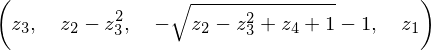

---


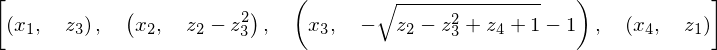

---


In [26]:
# Berechnung der Umkehrtransformation
zz = st.symb_vector("z1:5")

res = sp.solve(T-zz, xx)[0] ##:

rplmts = st.lzip(xx, res) ##:


System in BI-Normalform $\dot z = \left(T'(x) (f(x) + g(x) u\right)\big|_{~x = T^{-1}(z)}$ überführen.

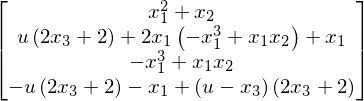

---


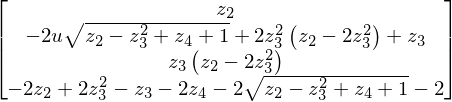

___


In [34]:
z_dot_tmp = T.jacobian(xx)*(f + g*u) ##:

z_dot = z_dot_tmp.subs(rplmts)
z_dot.simplify()
z_dot ##:

Damit ist das System in die BI-NF überführt. Das kann für den Beobachter-Entwurf ausgenutzt werden (nächste Übung).